In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, precision_score, mean_absolute_error, r2_score
from sklearn.decomposition import PCA
import folium

In [ ]:
# Load datasets
trip = pd.read_csv('/content/drive/MyDrive/ridewise_data/trips.csv')
session = pd.read_csv('/content/drive/MyDrive/ridewise_data/sessions.csv')
drivers = pd.read_csv('/content/drive/MyDrive/ridewise_data/drivers.csv')
promotion = pd.read_csv('/content/drive/MyDrive/ridewise_data/promotions.csv')
riders = pd.read_csv('/content/drive/MyDrive/ridewise_data/riders.csv')


# Check the first few rows of each dataset to ensure data is loaded
print(trip.head())
print(session.head())
print(drivers.head())
print(promotion.head())
print(riders.head())


   trip_id user_id driver_id   fare  surge_multiplier   tip  payment_type  \
0  T000000  R05207    D00315  12.11               1.0  0.00          Card   
1  T000001  R09453    D03717   8.73               1.0  0.02          Card   
2  T000002  R00567    D02035  19.68               1.0  0.00          Card   
3  T000003  R09573    D02657  16.43               1.0  0.01  Mobile Money   
4  T000004  R03446    D01026   8.70               1.0  1.06          Card   

                 pickup_time               dropoff_time  pickup_lat  \
0  2024-11-27 18:41:50+02:27  2024-11-27 19:33:50+02:27   -1.108123   
1  2024-10-28 23:13:48+00:14  2024-10-28 23:26:48+00:14    6.675266   
2  2025-02-17 05:36:41+02:27  2025-02-17 05:52:41+02:27   -1.248589   
3  2024-06-18 19:27:14+02:05  2024-06-18 19:32:14+02:05   29.819554   
4  2024-10-05 09:58:16+02:27  2024-10-05 10:28:16+02:27   -1.676479   

   pickup_lng  dropoff_lat  dropoff_lng weather     city loyalty_status  
0   36.912209    -1.068155    36.875

In [ ]:
print(trip.info())
print(session.info())
print(drivers.info())
print(promotion.info())
print(riders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   trip_id           200000 non-null  object 
 1   user_id           200000 non-null  object 
 2   driver_id         200000 non-null  object 
 3   fare              200000 non-null  float64
 4   surge_multiplier  200000 non-null  float64
 5   tip               200000 non-null  float64
 6   payment_type      200000 non-null  object 
 7   pickup_time       200000 non-null  object 
 8   dropoff_time      200000 non-null  object 
 9   pickup_lat        200000 non-null  float64
 10  pickup_lng        200000 non-null  float64
 11  dropoff_lat       200000 non-null  float64
 12  dropoff_lng       200000 non-null  float64
 13  weather           200000 non-null  object 
 14  city              200000 non-null  object 
 15  loyalty_status    200000 non-null  object 
dtypes: float64(7), objec

# Data Preprocessing

In [ ]:
# Checking for missing values in each dataset
print("Trip Dataset Missing Values:")
print(trip.isnull().sum())

print("\nSession Dataset Missing Values:")
print(session.isnull().sum())


print("\nDrivers Dataset Missing Values:")
print(drivers.isnull().sum())


print("\nPromotion Dataset Missing Values:")
print(promotion.isnull().sum())


print("\nRiders Dataset Missing Values:")
print(riders.isnull().sum())

Trip Dataset Missing Values:
trip_id             0
user_id             0
driver_id           0
fare                0
surge_multiplier    0
tip                 0
payment_type        0
pickup_time         0
dropoff_time        0
pickup_lat          0
pickup_lng          0
dropoff_lat         0
dropoff_lng         0
weather             0
city                0
loyalty_status      0
dtype: int64

Session Dataset Missing Values:
session_id        0
rider_id          0
session_time      0
time_on_app       0
pages_visited     0
converted         0
city              0
loyalty_status    0
dtype: int64

Drivers Dataset Missing Values:
driver_id          0
rating             0
vehicle_type       0
signup_date        0
last_active        0
city               0
acceptance_rate    0
dtype: int64

Promotion Dataset Missing Values:
promo_id           0
promo_name         0
promo_type         0
promo_value        0
start_date         0
end_date           0
target_segment     0
city_scope         0
ab_t

In [ ]:
riders['referred_by'].unique()

array(['R00001', nan, 'R00002', ..., 'R09768', 'R02155', 'R07447'],
      dtype=object)

In [ ]:
# Fill missing values in 'referred_by' with the mode
riders['referred_by'] = riders['referred_by'].fillna(riders['referred_by'].mode()[0])

In [ ]:
# Checking for missing values in each dataset
print("Trip Dataset Missing Values:")
print(trip.isnull().sum())

print("\nSession Dataset Missing Values:")
print(session.isnull().sum())


print("\nDrivers Dataset Missing Values:")
print(drivers.isnull().sum())


print("\nPromotion Dataset Missing Values:")
print(promotion.isnull().sum())


print("\nRiders Dataset Missing Values:")
print(riders.isnull().sum())

Trip Dataset Missing Values:
trip_id             0
user_id             0
driver_id           0
fare                0
surge_multiplier    0
tip                 0
payment_type        0
pickup_time         0
dropoff_time        0
pickup_lat          0
pickup_lng          0
dropoff_lat         0
dropoff_lng         0
weather             0
city                0
loyalty_status      0
dtype: int64

Session Dataset Missing Values:
session_id        0
rider_id          0
session_time      0
time_on_app       0
pages_visited     0
converted         0
city              0
loyalty_status    0
dtype: int64

Drivers Dataset Missing Values:
driver_id          0
rating             0
vehicle_type       0
signup_date        0
last_active        0
city               0
acceptance_rate    0
dtype: int64

Promotion Dataset Missing Values:
promo_id           0
promo_name         0
promo_type         0
promo_value        0
start_date         0
end_date           0
target_segment     0
city_scope         0
ab_t

In [ ]:
# Check for duplicates in each dataset
print("Trip Dataset Duplicates:")
print(trip.duplicated().sum())

print("\nSession Dataset Duplicates:")
print(session.duplicated().sum())

print("\nDrivers Dataset Duplicates:")
print(drivers.duplicated().sum())

print("\nPromotion Dataset Duplicates:")
print(promotion.duplicated().sum())

print("\nRiders Dataset Duplicates:")
print(riders.duplicated().sum())

Trip Dataset Duplicates:
0

Session Dataset Duplicates:
0

Drivers Dataset Duplicates:
0

Promotion Dataset Duplicates:
0

Riders Dataset Duplicates:
0


In [ ]:
# Convert date columns to datetime with UTC
trip['pickup_time'] = pd.to_datetime(trip['pickup_time'], utc=True)
trip['dropoff_time'] = pd.to_datetime(trip['dropoff_time'], utc=True)
session['session_time'] = pd.to_datetime(session['session_time'], utc=True)
drivers['signup_date'] = pd.to_datetime(drivers['signup_date'], utc=True)
drivers['last_active'] = pd.to_datetime(drivers['last_active'], utc=True)
riders['signup_date'] = pd.to_datetime(riders['signup_date'], utc=True)

# Check the data types to confirm conversion
print("\nData Types After Conversion:")
print(trip.dtypes)
print(session.dtypes)
print(drivers.dtypes)
print(promotion.dtypes)
print(riders.dtypes)



Data Types After Conversion:
trip_id                          object
user_id                          object
driver_id                        object
fare                            float64
surge_multiplier                float64
tip                             float64
payment_type                     object
pickup_time         datetime64[ns, UTC]
dropoff_time        datetime64[ns, UTC]
pickup_lat                      float64
pickup_lng                      float64
dropoff_lat                     float64
dropoff_lng                     float64
weather                          object
city                             object
loyalty_status                   object
dtype: object
session_id                     object
rider_id                       object
session_time      datetime64[ns, UTC]
time_on_app                     int64
pages_visited                   int64
converted                       int64
city                           object
loyalty_status                 object
dtype: objec

# EDA

In [ ]:
# Popular routes (pickup to dropoff)
route_counts = trip.groupby(['pickup_lat', 'pickup_lng', 'dropoff_lat', 'dropoff_lng']).size().reset_index(name='route_count')
popular_routes = route_counts.sort_values(by='route_count', ascending=False).head(15)  # Top 10 popular routes
print("\nTop 10 Popular Routes:")
print(popular_routes)



Top 10 Popular Routes:
        pickup_lat  pickup_lng  dropoff_lat  dropoff_lng  route_count
199983   30.543353   30.955222    30.580260    30.919291            1
199982   30.543282   30.800728    30.592457    30.755432            1
199981   30.543206   31.297464    30.495973    31.293016            1
199980   30.543183   30.895344    30.526153    30.942981            1
199979   30.543161   31.376961    30.521458    31.367228            1
199978   30.542957   30.918480    30.510192    30.967907            1
199977   30.542655   31.026874    30.511138    30.981205            1
199976   30.542650   30.795828    30.585734    30.753775            1
199975   30.542377   31.019084    30.565224    31.068846            1
199974   30.542215   31.161915    30.582361    31.166057            1
199973   30.542214   31.418481    30.581174    31.425211            1
199972   30.542210   31.262608    30.544813    31.251789            1
199971   30.541987   30.799127    30.573002    30.816197          

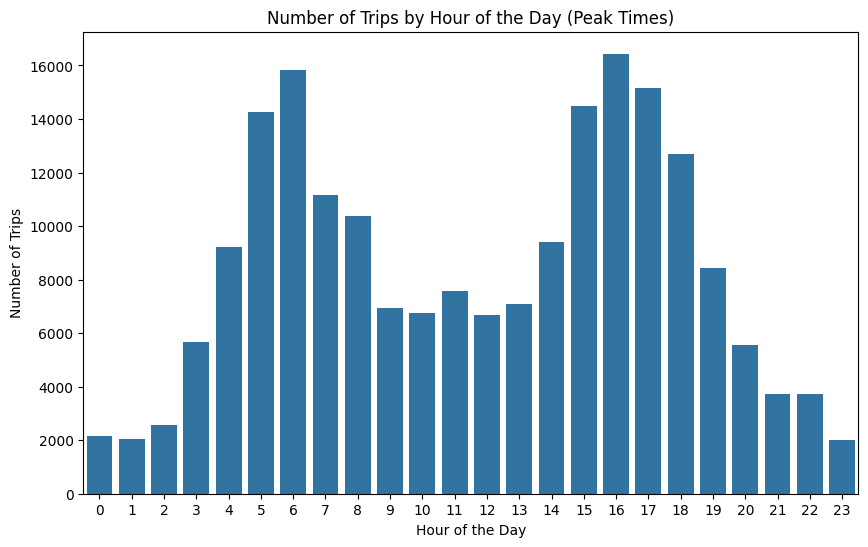

In [ ]:
# Peak times (hour of the day from pickup time)
trip['pickup_time'] = pd.to_datetime(trip['pickup_time'], utc=True)
trip['pickup_hour'] = trip['pickup_time'].dt.hour
peak_times = trip.groupby('pickup_hour').size().reset_index(name='trip_count')
plt.figure(figsize=(10, 6))
sns.barplot(x='pickup_hour', y='trip_count', data=peak_times)
plt.title('Number of Trips by Hour of the Day (Peak Times)')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.show()


In [ ]:
# Step 2: Rider Behavior

# Frequency: Number of trips per rider
rider_frequency = trip.groupby('user_id').size().reset_index(name='frequency')
# Recency: Days since last trip (assuming pickup_time is in UTC)
recency = (pd.to_datetime('today', utc=True) - trip.groupby('user_id')['pickup_time'].max()).dt.days
# Monetary: Total fare per rider
monetary = trip.groupby('user_id')['fare'].sum()

# Merging behavior data with riders dataset
riders['recency'] = recency
riders['frequency'] = rider_frequency['frequency']
riders['monetary'] = monetary


In [ ]:
# Step 3: Driver Activity and Ratings

# Analyze Driver Ratings and Activity (e.g., acceptance rate, last active date)
# Explicitly create a copy to avoid 'SettingWithCopyWarning'
driver_activity = drivers[['driver_id', 'rating', 'acceptance_rate', 'last_active']].copy()

# Convert 'last_active' to datetime format and make sure it's timezone-aware (UTC)
driver_activity['last_active'] = pd.to_datetime(driver_activity['last_active'], utc=True)

# Calculate days since last active
driver_activity['days_since_last_active'] = (pd.to_datetime('today', utc=True) - driver_activity['last_active']).dt.days

# Check the result
print("\nDriver Activity Data (first few rows):")
print(driver_activity.head(10))



Driver Activity Data (first few rows):
  driver_id  rating  acceptance_rate                      last_active  \
0    D00000     3.1         0.679555 2025-01-06 18:23:09.312275+00:00   
1    D00001     5.0         0.548786 2025-04-27 01:44:02.472554+00:00   
2    D00002     4.5         0.593724 2025-03-07 19:24:46.367672+00:00   
3    D00003     5.0         0.990000 2025-03-26 19:16:24.253793+00:00   
4    D00004     4.4         0.519773 2025-04-08 18:54:44.649615+00:00   
5    D00005     3.1         0.874726 2024-12-15 23:26:07.576316+00:00   
6    D00006     3.7         0.533316 2025-04-14 10:51:50.515170+00:00   
7    D00007     4.6         0.990000 2025-04-26 15:28:54.426466+00:00   
8    D00008     3.3         0.759021 2024-02-01 02:00:44.364179+00:00   
9    D00009     4.1         0.532947 2025-02-15 11:39:11.493933+00:00   

   days_since_last_active  
0                     125  
1                      15  
2                      65  
3                      46  
4               

In [ ]:
# Step 5: Referral Chains and Network Impact

# Explore referral chains using 'referred_by' column
referral_chain = riders.groupby('referred_by').size().reset_index(name='referral_count')
print("\nReferral Chains (User Referrals Count):")
print(referral_chain.head(10))



Referral Chains (User Referrals Count):
  referred_by  referral_count
0      R00000               6
1      R00001              33
2      R00002            6993
3      R00003               3
4      R00004              20
5      R00005              12
6      R00006               4
7      R00007              12
8      R00008               6
9      R00009               2


In [ ]:
# import folium
# from IPython.display import display

# # Create a map for pickup and dropoff locations using folium
# m = folium.Map(location=[trip['pickup_lat'].mean(), trip['pickup_lng'].mean()], zoom_start=12)

# # Plot pickup locations
# for _, row in trip.iterrows():
#     folium.CircleMarker([row['pickup_lat'], row['pickup_lng']], radius=3, color='blue', fill=True).add_to(m)

# # Plot dropoff locations
# for _, row in trip.iterrows():
#     folium.CircleMarker([row['dropoff_lat'], row['dropoff_lng']], radius=3, color='red', fill=True).add_to(m)

# # Display the map (in Jupyter Notebook, it will render in the output cell)
# display(m)


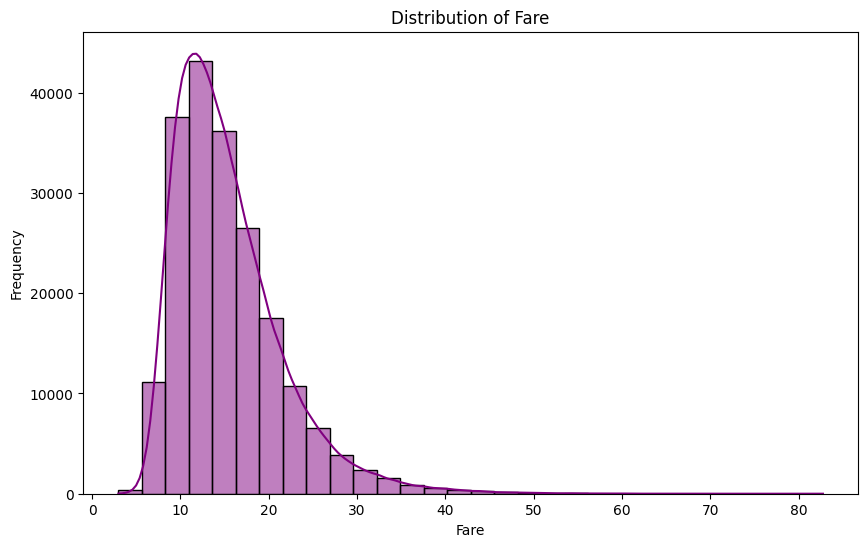

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Distribution of Fare
plt.figure(figsize=(10, 6))
sns.histplot(trip['fare'], kde=True, color='purple', bins=30)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()



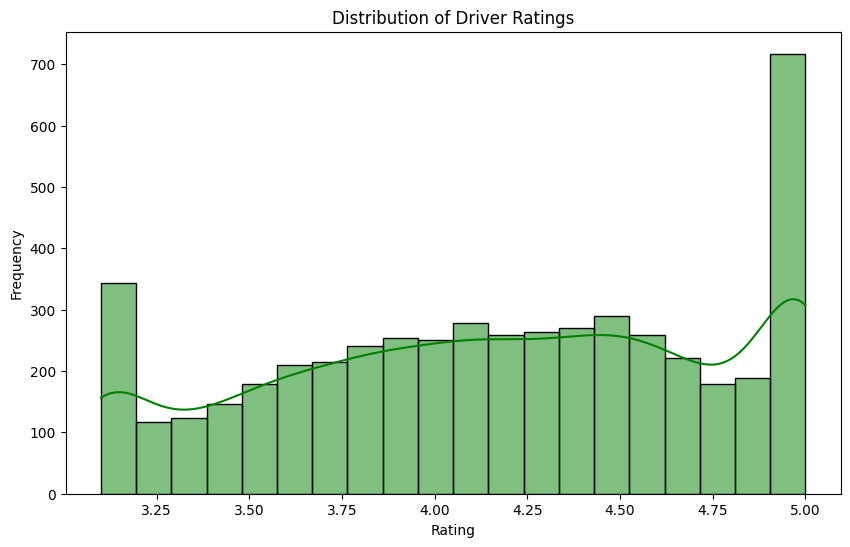

In [ ]:
# Step 2: Distribution of Driver Ratings
plt.figure(figsize=(10, 6))
sns.histplot(drivers['rating'], kde=True, color='green', bins=20)
plt.title('Distribution of Driver Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()



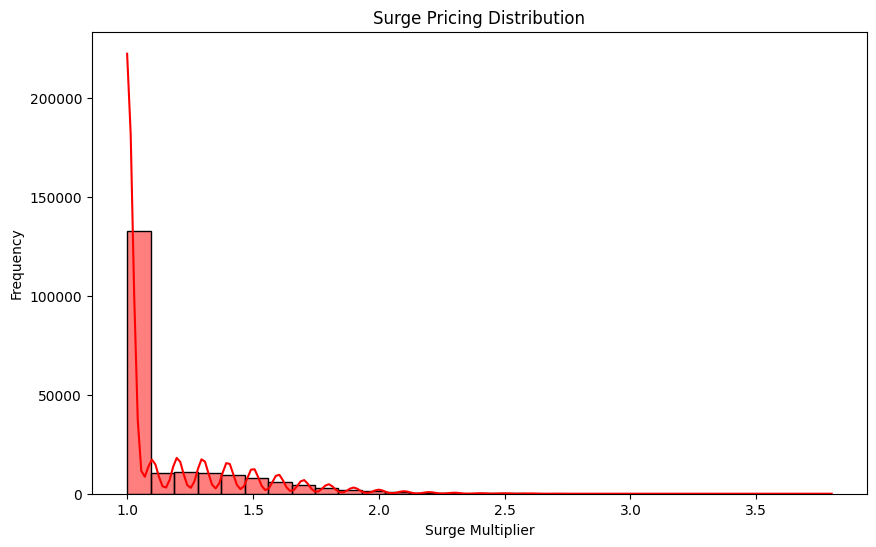

In [ ]:
# Step 3: Surge Pricing Distribution
plt.figure(figsize=(10, 6))
sns.histplot(trip['surge_multiplier'], kde=True, color='red', bins=30)
plt.title('Surge Pricing Distribution')
plt.xlabel('Surge Multiplier')
plt.ylabel('Frequency')
plt.show()



<ipython-input-98-d7e05611924c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loyalty_status', data=riders, palette='Blues')


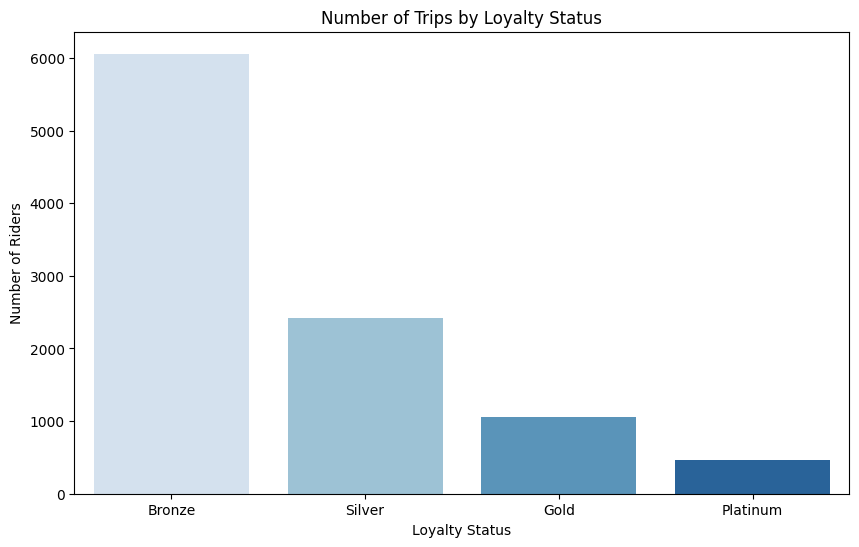

In [ ]:
# Step 4: Number of Trips by User Segment (Loyalty Status)
plt.figure(figsize=(10, 6))
sns.countplot(x='loyalty_status', data=riders, palette='Blues')
plt.title('Number of Trips by Loyalty Status')
plt.xlabel('Loyalty Status')
plt.ylabel('Number of Riders')
plt.show()

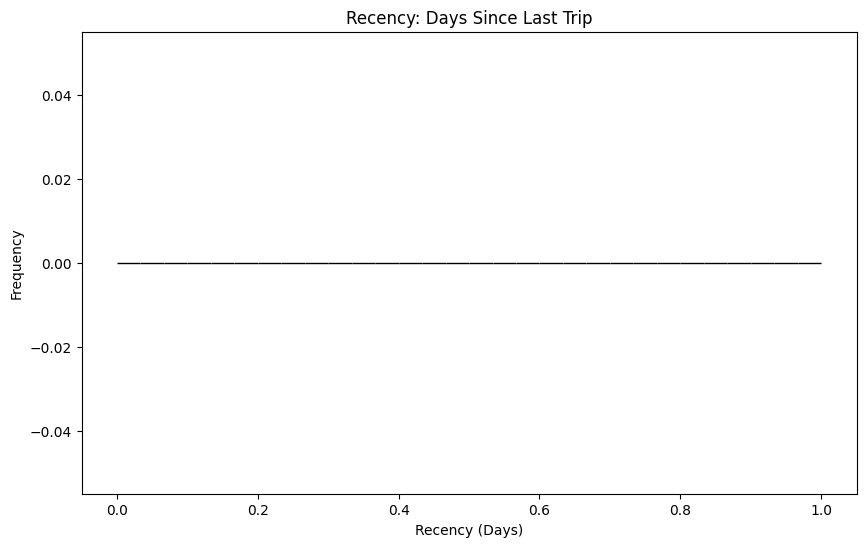

In [ ]:
# Step 5: Rider Behavior: Recency, Frequency, and Monetary

# Recency Distribution (Days since last trip)
plt.figure(figsize=(10, 6))
sns.histplot(riders['recency'], kde=True, color='blue', bins=30)
plt.title('Recency: Days Since Last Trip')
plt.xlabel('Recency (Days)')
plt.ylabel('Frequency')
plt.show()



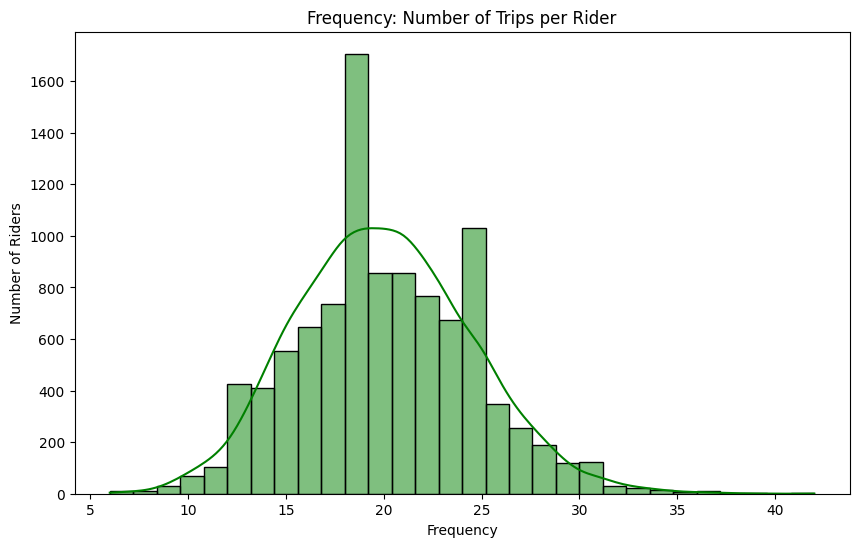

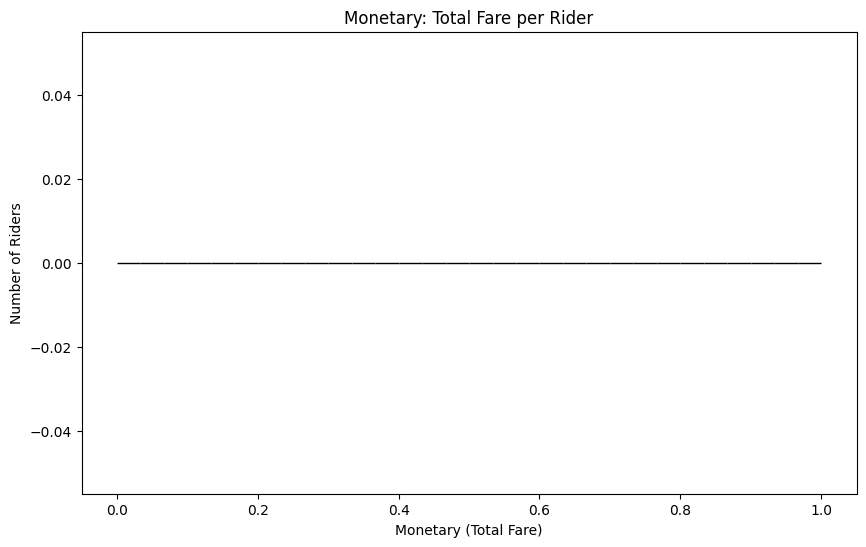

In [ ]:
# Frequency Distribution (Number of Trips per Rider)
plt.figure(figsize=(10, 6))
sns.histplot(riders['frequency'], kde=True, color='green', bins=30)
plt.title('Frequency: Number of Trips per Rider')
plt.xlabel('Frequency')
plt.ylabel('Number of Riders')
plt.show()

# Monetary Distribution (Total Fare per Rider)
plt.figure(figsize=(10, 6))
sns.histplot(riders['monetary'], kde=True, color='orange', bins=30)
plt.title('Monetary: Total Fare per Rider')
plt.xlabel('Monetary (Total Fare)')
plt.ylabel('Number of Riders')
plt.show()



## 1. Feature Engineering (Recency, Frequency, Monetary for Customer Segmentation):

In [ ]:
import pandas as pd

# Assuming 'trip' and 'riders' DataFrames are already loaded

# Convert 'today' to a timezone-aware datetime (to match with pickup_time in UTC)
today = pd.to_datetime('today', utc=True)

# Feature Engineering: RFM (Recency, Frequency, Monetary)

# Recency: Days since the last trip (for churn prediction)
recency = (today - trip.groupby('user_id')['pickup_time'].max()).dt.days

# Frequency: Number of trips per rider
frequency = trip.groupby('user_id')['trip_id'].count()

# Monetary: Total fare per rider
monetary = trip.groupby('user_id')['fare'].sum()

# Create a DataFrame for recency, frequency, and monetary values
rfm_df = pd.DataFrame({
    'recency': recency,
    'frequency': frequency,
    'monetary': monetary
}).reset_index()  # Make sure user_id is a column for proper merging

# Merge the RFM values with the riders dataset on 'user_id'
riders = pd.merge(riders, rfm_df, on='user_id', how='left')

# Check the newly added features
print("\nRiders Dataset with RFM Features (first few rows):")
# The error was in this line. The columns were referenced before being added to the DataFrame.
# Fixed by ensuring the merge happens before accessing the new columns.
print(riders[['user_id', 'recency', 'frequency', 'monetary']].head(20)) # The columns are now available after the merge


Riders Dataset with RFM Features (first few rows):
   user_id  recency  frequency  monetary
0   R00000       39         25    366.05
1   R00001       20         14    180.53
2   R00002       29         24    378.99
3   R00003       76          9    121.47
4   R00004       27         16    268.43
5   R00005       16         19    274.42
6   R00006       81         14    199.01
7   R00007       33         19    366.09
8   R00008       21         19    272.18
9   R00009       94         14    253.57
10  R00010       14         31    447.56
11  R00011       34         18    312.18
12  R00012       35         23    328.94
13  R00013       61         14    226.87
14  R00014       18         29    427.76
15  R00015       20         26    405.48
16  R00016       35         20    308.93
17  R00017       17         19    287.47
18  R00018       26         24    319.60
19  R00019       18         26    461.88


In [ ]:
riders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   user_id           10000 non-null  object             
 1   signup_date       10000 non-null  datetime64[ns, UTC]
 2   loyalty_status    10000 non-null  object             
 3   age               10000 non-null  float64            
 4   city              10000 non-null  object             
 5   avg_rating_given  10000 non-null  float64            
 6   churn_prob        10000 non-null  float64            
 7   referred_by       10000 non-null  object             
 8   recency_x         0 non-null      float64            
 9   frequency_x       10000 non-null  int64              
 10  monetary_x        0 non-null      float64            
 11  recency_y         10000 non-null  int64              
 12  frequency_y       10000 non-null  int64              
 13  mo

In [ ]:
rfm_features

,recency,frequency,monetary
0,39,25,366.05
1,20,14,180.53
2,29,24,378.99
3,76,9,121.47
4,26,16,268.43
...,...,...,...
9995,15,13,203.15
9996,16,15,206.71
9997,60,18,309.83
9998,33,22,342.05


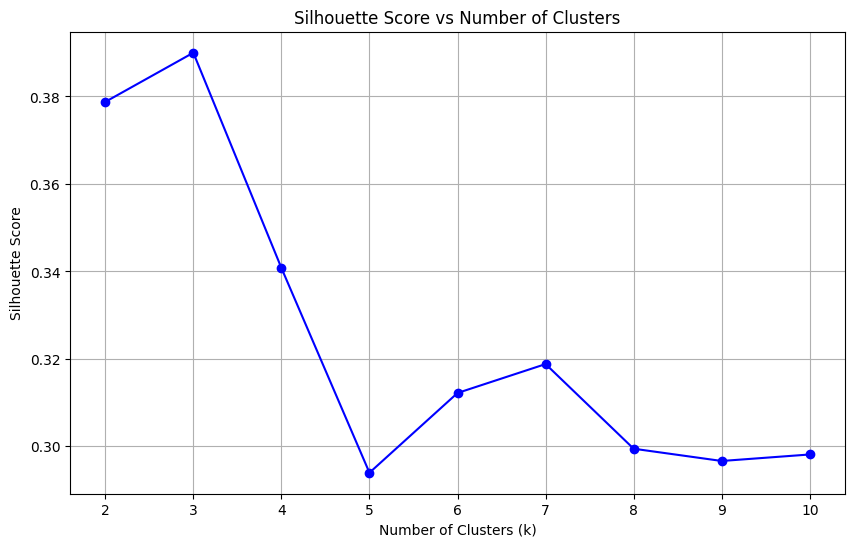

The best number of clusters based on Silhouette Score is: 3


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Feature Engineering: Standardize RFM (Recency, Frequency, Monetary)
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_features)

# Step 1: Try different values of k (number of clusters)
silhouette_scores = []

# Try k = 2 to 10 clusters and calculate the Silhouette Score
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(rfm_scaled)

    # Calculate the silhouette score
    score = silhouette_score(rfm_scaled, clusters)
    silhouette_scores.append(score)

# Step 2: Plot the Silhouette Scores for different k values
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Step 3: Select the number of clusters that gives the highest silhouette score
best_k = range(2, 11)[silhouette_scores.index(max(silhouette_scores))]
print(f"The best number of clusters based on Silhouette Score is: {best_k}")


Silhouette Score: 0.3898909935991851


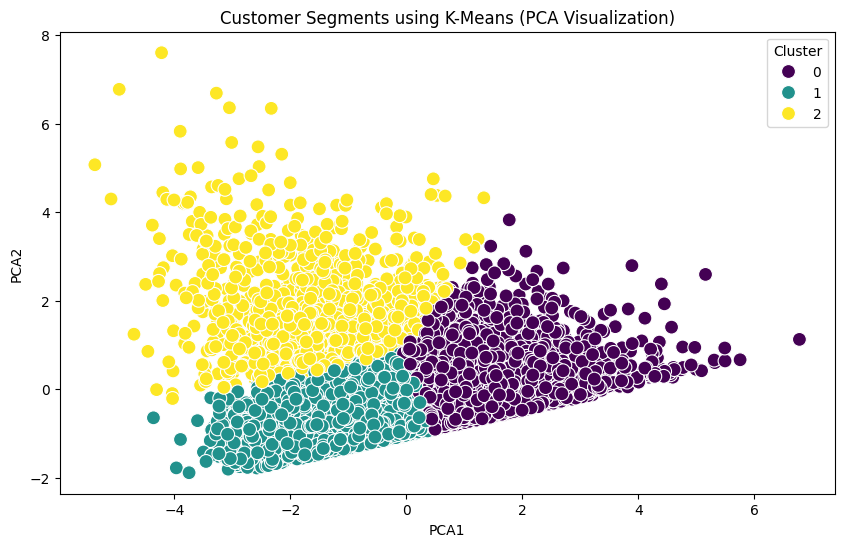


Cluster Centroids (RFM Feature Values):
[[-0.2707558   0.92085919  0.91725448]
 [-0.32376021 -0.64247287 -0.65024998]
 [ 1.95742256 -0.68189541 -0.64395459]]

Cluster Distribution:
cluster
1    4540
0    4138
2    1322
Name: count, dtype: int64


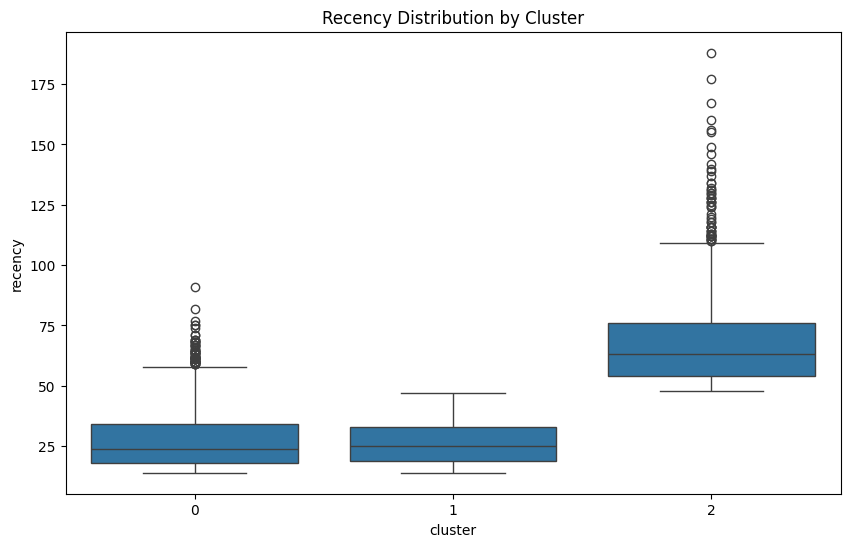

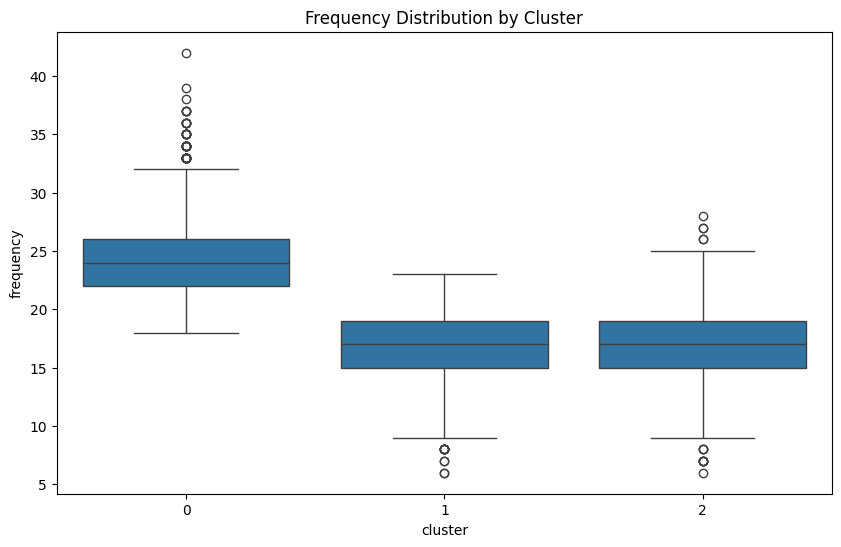

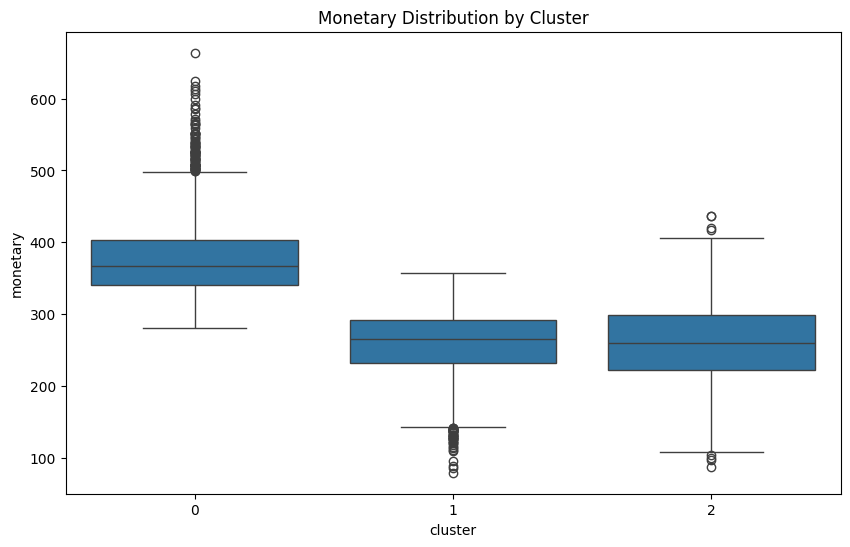

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Select the relevant features for segmentation (Recency, Frequency, Monetary)
rfm_features = riders[['recency', 'frequency', 'monetary']]

# Step 2: Standardize the features (important for clustering algorithms)
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_features)

# Step 3: Apply K-Means clustering with 5+ clusters
kmeans = KMeans(n_clusters=3, random_state=42)
riders['cluster'] = kmeans.fit_predict(rfm_scaled)

# Step 4: Calculate the Silhouette Score to evaluate clustering quality
silhouette_avg = silhouette_score(rfm_scaled, riders['cluster'])
print(f"Silhouette Score: {silhouette_avg}")

# Step 5: Visualizing the clusters using PCA (Principal Component Analysis)
# Reduce the dimensionality to 2 components for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(rfm_scaled)
riders['pca1'] = pca_components[:, 0]
riders['pca2'] = pca_components[:, 1]

# Plotting the clusters in PCA space
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=riders, palette='viridis', s=100)
plt.title('Customer Segments using K-Means (PCA Visualization)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()

# Step 6: Analyze cluster centroids and their characteristics
centroids = kmeans.cluster_centers_
print("\nCluster Centroids (RFM Feature Values):")
print(centroids)

# Step 7: Check the distribution of clusters in the dataset
print("\nCluster Distribution:")
print(riders['cluster'].value_counts())

# Step 8: Visualizing the behavior of the clusters in terms of RFM features
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='recency', data=riders)
plt.title('Recency Distribution by Cluster')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='frequency', data=riders)
plt.title('Frequency Distribution by Cluster')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='monetary', data=riders)
plt.title('Monetary Distribution by Cluster')
plt.show()


## Churn Prediciton

In [ ]:
!pip install imbalanced-learn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, precision_score
from imblearn.over_sampling import SMOTE

# Example: Create a churn label (1 for churned, 0 for not churned)
riders['churn'] = (riders['recency'] > 90).astype(int)  # Example: churned if last trip was > 3 months ago




# Split the data
X = riders[['recency', 'frequency', 'monetary']]
y = riders['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train a RandomForestClassifier with reduced complexity and class_weight
model = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42, class_weight='balanced')
model.fit(X_train_resampled, y_train_resampled)

# Predictions and Evaluation
y_pred = model.predict(X_test)

# Calculate AUC and Precision
auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
precision = precision_score(y_test, y_pred)

print(f'AUC: {auc}')
print(f'Precision: {precision}')

# ... (Rest of your code)

AUC: 0.9999999999999999
Precision: 1.0


Class Distribution Before SMOTE (Training Set):
churn
0    0.984
1    0.016
Name: proportion, dtype: float64


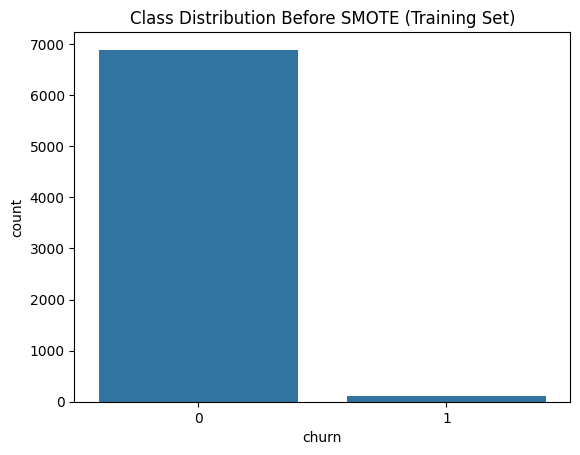

In [ ]:
!pip install imbalanced-learn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, precision_score, classification_report
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Select Churn Label and Show Data Distribution ---
# Adjust churn definition to a lower recency threshold
riders['churn'] = (riders['recency'] > 90).astype(int)

# Split the data
X = riders[['recency', 'frequency', 'monetary']]
y = riders['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Show data distribution before SMOTE
print("Class Distribution Before SMOTE (Training Set):")
print(y_train.value_counts(normalize=True))
sns.countplot(x=y_train)
plt.title('Class Distribution Before SMOTE (Training Set)')
plt.show()



Class Distribution After SMOTE (Training Set):
churn
0    0.5
1    0.5
Name: proportion, dtype: float64


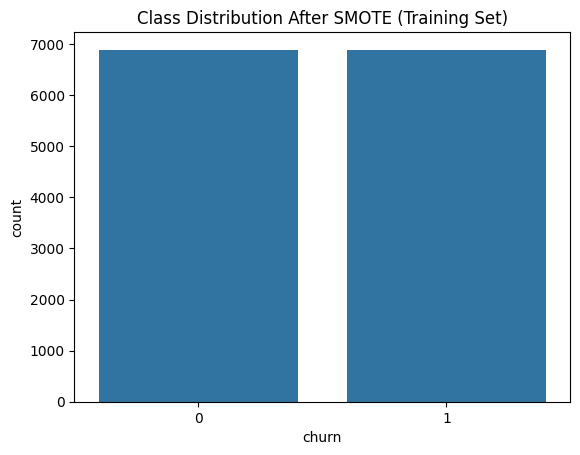

In [ ]:

# --- 2. Apply SMOTE and Show Distribution After SMOTE ---
# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Show data distribution after SMOTE
print("\nClass Distribution After SMOTE (Training Set):")
print(pd.Series(y_train_resampled).value_counts(normalize=True))
sns.countplot(x=y_train_resampled)
plt.title('Class Distribution After SMOTE (Training Set)')
plt.show()


In [ ]:

# --- 3. Apply the Model and Show AUC with Two Class Results ---
# Train a RandomForestClassifier with reduced complexity and class_weight
model = RandomForestClassifier(n_estimators=50, max_depth=500, random_state=42, class_weight='balanced')
model.fit(X_train_resampled, y_train_resampled)

# Predictions and Evaluation
y_pred = model.predict(X_test)

# Calculate AUC and Precision
auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
precision = precision_score(y_test, y_pred)

print(f'\nAUC: {auc}')
print(f'Precision: {precision}')

# Show classification report for both classes
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


AUC: 1.0
Precision: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2949
           1       1.00      1.00      1.00        51

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



#  Driver Retention Prediction

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, r2_score


# Convert 'today' to a timezone-aware datetime with UTC
today = pd.to_datetime('today', utc=True)
drivers['retained'] = (drivers['last_active'] >= today - pd.Timedelta(days=90)).astype(int)

# Split the data
X_driver = drivers[['rating']]  # You can add more features
y_driver = drivers['retained']

# Train-test split
X_train_driver, X_test_driver, y_train_driver, y_test_driver = train_test_split(X_driver, y_driver, test_size=0.3, random_state=42)

# Train a RandomForestClassifier (or another regression model if appropriate)
model_driver = RandomForestClassifier(n_estimators=100, random_state=42)
model_driver.fit(X_train_driver, y_train_driver)

# Predictions and Evaluation
y_pred_driver = model_driver.predict(X_test_driver)

# Calculate MAE and R-squared
mae_driver = mean_absolute_error(y_test_driver, y_pred_driver)
r2_driver = r2_score(y_test_driver, y_pred_driver)

print(f'Driver Retention MAE: {mae_driver}')
print(f'Driver Retention R-squared: {r2_driver}')



Driver Retention MAE: 0.098
Driver Retention R-squared: 0.11806702690595505


#  Surge Pricing Prediction

In [ ]:
# Example: Predict surge multiplier based on features
X_surge = trip[['fare', 'surge_multiplier']]  # Removed 'pickup_time'
y_surge = trip['surge_multiplier']

# Train-test split
X_train_surge, X_test_surge, y_train_surge, y_test_surge = train_test_split(X_surge, y_surge, test_size=0.3, random_state=42)

# Train a RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

model_surge = RandomForestRegressor(n_estimators=100, random_state=42)
model_surge.fit(X_train_surge, y_train_surge)

# Predictions and Evaluation
y_pred_surge = model_surge.predict(X_test_surge)

# Calculate MAE and R²
mae_surge = mean_absolute_error(y_test_surge, y_pred_surge)
r2_surge = r2_score(y_test_surge, y_pred_surge)

print(f'Surge Pricing MAE: {mae_surge}')
print(f'Surge Pricing R²: {r2_surge}')

Surge Pricing MAE: 6.000000008241383e-06
Surge Pricing R²: 0.999979599760164
